## 대중교통과 날씨 간의 상관관계

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

### 9월 날씨 데이터 로드

In [2]:
weather = pd.read_csv('OBS_ASOS_DD_20211106114909.csv', encoding='euc-kr')

In [3]:
weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,108,서울,2021-09-01,21.4,18.5,121,23.9,1525,4.08,0.7,...,23.7,24.5,24.8,20.5,16.4,1.9,2.7,0.0,-{박무}-0020. -{비}-0040. {비}0645-{비}{강도0}0900-1010.,NaN
1,108,서울,2021-09-02,23.5,20.7,551,26.7,1359,NaN,NaN,...,23.6,24.2,24.7,20.7,16.5,3.0,4.3,NaN,NaN,NaN
2,108,서울,2021-09-03,24.3,20.6,455,29.2,1543,NaN,NaN,...,23.9,24.0,24.5,20.4,16.5,5.3,7.6,NaN,NaN,NaN
3,108,서울,2021-09-04,23.2,18.5,548,28.6,1505,NaN,NaN,...,24.3,23.9,24.3,20.2,16.6,4.7,6.8,NaN,{햇무리}1340-1515.,NaN
4,108,서울,2021-09-05,23.1,19.4,458,27.3,1311,NaN,NaN,...,24.3,23.9,24.2,20.1,16.6,4.0,5.7,NaN,NaN,NaN
5,108,서울,2021-09-06,22.3,18.0,2345,26.4,1252,9.17,1.2,...,24.2,23.8,24.1,20.1,16.7,2.6,3.7,23.7,{비}1450-{비}{강도0}1500-{비}{강도0}1800-{비}{강도1}2100...,NaN
6,108,서울,2021-09-07,19.6,17.6,112,20.9,1629,22.58,2.4,...,23.8,23.8,24.0,20.0,16.7,0.6,0.8,19.5,-{비}-{비}{강도0}0300-{비}{강도0}0600-{비}{강도0}0900-{비...,NaN
7,108,서울,2021-09-08,22.2,19.0,543,26.9,1428,6.67,0.3,...,23.2,23.6,23.9,20.0,16.7,3.3,4.8,NaN,-{안개비}-{안개비}{강도0}0300-{안개비}{강도0}0600-0640. -{박...,NaN
8,108,서울,2021-09-09,23.5,19.1,432,29.1,1610,NaN,NaN,...,23.5,23.5,23.9,20.1,16.8,3.3,4.7,NaN,NaN,NaN
9,108,서울,2021-09-10,23.6,19.5,615,28.9,1423,NaN,NaN,...,23.9,23.4,23.8,20.1,16.8,3.5,4.9,NaN,NaN,NaN


### 9월 지하철 승객수 데이터 로드

In [60]:
subway = pd.read_csv('CARD_SUBWAY_MONTH_202109 (1).csv', index_col = False)

In [61]:
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210901,4호선,동작(현충원),1929,1999,20210904
1,20210901,4호선,총신대입구(이수),17219,18876,20210904
2,20210901,4호선,사당,21027,17484,20210904
3,20210901,4호선,남태령,1089,986,20210904
4,20210901,4호선,당고개,11684,10696,20210904
...,...,...,...,...,...,...
18043,20210930,9호선,신논현,28562,28302,20211003
18044,20210930,9호선2~3단계,언주,9859,10044,20211003
18045,20210930,9호선2~3단계,선정릉,9308,10135,20211003
18046,20210930,9호선2~3단계,삼성중앙,6389,6552,20211003


In [43]:
weather_select = weather.loc[:,['일시', '강수 계속시간(hr)']]

In [44]:
weather_select

,일시,강수 계속시간(hr)
0,2021-09-01,4.08
1,2021-09-02,NaN
2,2021-09-03,NaN
3,2021-09-04,NaN
4,2021-09-05,NaN
5,2021-09-06,9.17
6,2021-09-07,22.58
7,2021-09-08,6.67
8,2021-09-09,NaN
9,2021-09-10,NaN


In [62]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18048 entries, 0 to 18047
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18048 non-null  int64 
 1   노선명     18048 non-null  object
 2   역명      18048 non-null  object
 3   승차총승객수  18048 non-null  int64 
 4   하차총승객수  18048 non-null  int64 
 5   등록일자    18048 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 846.1+ KB


In [9]:
weather_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           30 non-null     object 
 1   강수 계속시간(hr)  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [128]:
subway['승객수'] = subway['승차총승객수']+subway['하차총승객수'] # 승객수 = 승차총승객수 + 하차총승객수

In [129]:
subway_select = subway.loc[:,['사용일자','노선명', '역명', '승객수']]

In [130]:
subway_select

,사용일자,노선명,역명,승객수
0,20210901,4호선,동작(현충원),3928
1,20210901,4호선,총신대입구(이수),36095
2,20210901,4호선,사당,38511
3,20210901,4호선,남태령,2075
4,20210901,4호선,당고개,22380
...,...,...,...,...
18043,20210930,9호선,신논현,56864
18044,20210930,9호선2~3단계,언주,19903
18045,20210930,9호선2~3단계,선정릉,19443
18046,20210930,9호선2~3단계,삼성중앙,12941


#### rain dataframe

In [131]:
rain = pd.DataFrame({'비':['20210901', '20210906', '20210907', '20210908', '20210921', '20210922', '20210927', '20210928', '20210929']})

In [132]:
rain

,비
0,20210901
1,20210906
2,20210907
3,20210908
4,20210921
5,20210922
6,20210927
7,20210928
8,20210929


In [133]:
subway_select['비'] = subway_select['사용일자'].isin(rain['비'])

In [134]:
subway_select

,사용일자,노선명,역명,승객수,비
0,20210901,4호선,동작(현충원),3928,True
1,20210901,4호선,총신대입구(이수),36095,True
2,20210901,4호선,사당,38511,True
3,20210901,4호선,남태령,2075,True
4,20210901,4호선,당고개,22380,True
...,...,...,...,...,...
18043,20210930,9호선,신논현,56864,False
18044,20210930,9호선2~3단계,언주,19903,False
18045,20210930,9호선2~3단계,선정릉,19443,False
18046,20210930,9호선2~3단계,삼성중앙,12941,False


In [135]:
subway_station = subway_select.groupby(['사용일자', '노선명', '역명'], as_index=False).mean()

In [136]:
subway_station

,사용일자,노선명,역명,승객수,비
0,20210901,1호선,동대문,19441.0,True
1,20210901,1호선,동묘앞,15109.0,True
2,20210901,1호선,서울역,68548.0,True
3,20210901,1호선,시청,39032.0,True
4,20210901,1호선,신설동,25828.0,True
...,...,...,...,...,...
18042,20210930,중앙선,원덕,827.0,False
18043,20210930,중앙선,중랑,11041.0,False
18044,20210930,중앙선,지평,173.0,False
18045,20210930,중앙선,팔당,1982.0,False


In [137]:
subway_rain = subway_station[subway_station['비']==True]

In [138]:
subway_rain

,사용일자,노선명,역명,승객수,비
0,20210901,1호선,동대문,19441.0,True
1,20210901,1호선,동묘앞,15109.0,True
2,20210901,1호선,서울역,68548.0,True
3,20210901,1호선,시청,39032.0,True
4,20210901,1호선,신설동,25828.0,True
...,...,...,...,...,...
17440,20210929,중앙선,원덕,621.0,True
17441,20210929,중앙선,중랑,10175.0,True
17442,20210929,중앙선,지평,94.0,True
17443,20210929,중앙선,팔당,1365.0,True


In [139]:
subway_sunny = subway_station[subway_station['비']==False]

In [140]:
subway_sunny

,사용일자,노선명,역명,승객수,비
601,20210902,1호선,동대문,20418.0,False
602,20210902,1호선,동묘앞,16222.0,False
603,20210902,1호선,서울역,70516.0,False
604,20210902,1호선,시청,39198.0,False
605,20210902,1호선,신설동,26224.0,False
...,...,...,...,...,...
18042,20210930,중앙선,원덕,827.0,False
18043,20210930,중앙선,중랑,11041.0,False
18044,20210930,중앙선,지평,173.0,False
18045,20210930,중앙선,팔당,1982.0,False


In [141]:
subway_rain.rename(columns = {'승객수':'rain_승객수'}, inplace=True)
subway_sunny.rename(columns = {'승객수':'sunny_승객수'}, inplace=True)

In [142]:
subway_rain

,사용일자,노선명,역명,rain_승객수,비
0,20210901,1호선,동대문,19441.0,True
1,20210901,1호선,동묘앞,15109.0,True
2,20210901,1호선,서울역,68548.0,True
3,20210901,1호선,시청,39032.0,True
4,20210901,1호선,신설동,25828.0,True
...,...,...,...,...,...
17440,20210929,중앙선,원덕,621.0,True
17441,20210929,중앙선,중랑,10175.0,True
17442,20210929,중앙선,지평,94.0,True
17443,20210929,중앙선,팔당,1365.0,True


In [143]:
subway_sunny

,사용일자,노선명,역명,sunny_승객수,비
601,20210902,1호선,동대문,20418.0,False
602,20210902,1호선,동묘앞,16222.0,False
603,20210902,1호선,서울역,70516.0,False
604,20210902,1호선,시청,39198.0,False
605,20210902,1호선,신설동,26224.0,False
...,...,...,...,...,...
18042,20210930,중앙선,원덕,827.0,False
18043,20210930,중앙선,중랑,11041.0,False
18044,20210930,중앙선,지평,173.0,False
18045,20210930,중앙선,팔당,1982.0,False


In [144]:
subway_rain2 = subway_rain.groupby('노선명', as_index=False).mean().loc[:,['노선명', 'rain_승객수']]
subway_sunny2 = subway_sunny.groupby('노선명', as_index=False).mean().loc[:,['노선명', 'sunny_승객수']]

In [145]:
subway_rain2

,노선명,rain_승객수
0,1호선,32917.244444
1,2호선,41120.957778
2,3호선,23323.778146
3,4호선,28518.179487
4,5호선,17606.611111
5,6호선,13314.070588
6,7호선,21295.078431
7,8호선,16938.575163
8,9호선,16976.213333
9,9호선2~3단계,11185.282051


In [146]:
subway_sunny2

,노선명,sunny_승객수
0,1호선,33417.538095
1,2호선,39209.180000
2,3호선,22704.274648
3,4호선,27862.820513
4,5호선,16607.281463
5,6호선,12954.651572
6,7호선,19972.739496
7,8호선,16017.299720
8,9호선,16088.563810
9,9호선2~3단계,10260.069597


In [147]:
subway_df = pd.merge(left = subway_rain2, right = subway_sunny2, how="inner", on="노선명")

In [148]:
subway_df

,노선명,rain_승객수,sunny_승객수
0,1호선,32917.244444,33417.538095
1,2호선,41120.957778,39209.180000
2,3호선,23323.778146,22704.274648
3,4호선,28518.179487,27862.820513
4,5호선,17606.611111,16607.281463
5,6호선,13314.070588,12954.651572
6,7호선,21295.078431,19972.739496
7,8호선,16938.575163,16017.299720
8,9호선,16976.213333,16088.563810
9,9호선2~3단계,11185.282051,10260.069597


Text(0.5, 1.0, '9월 총 승객수')

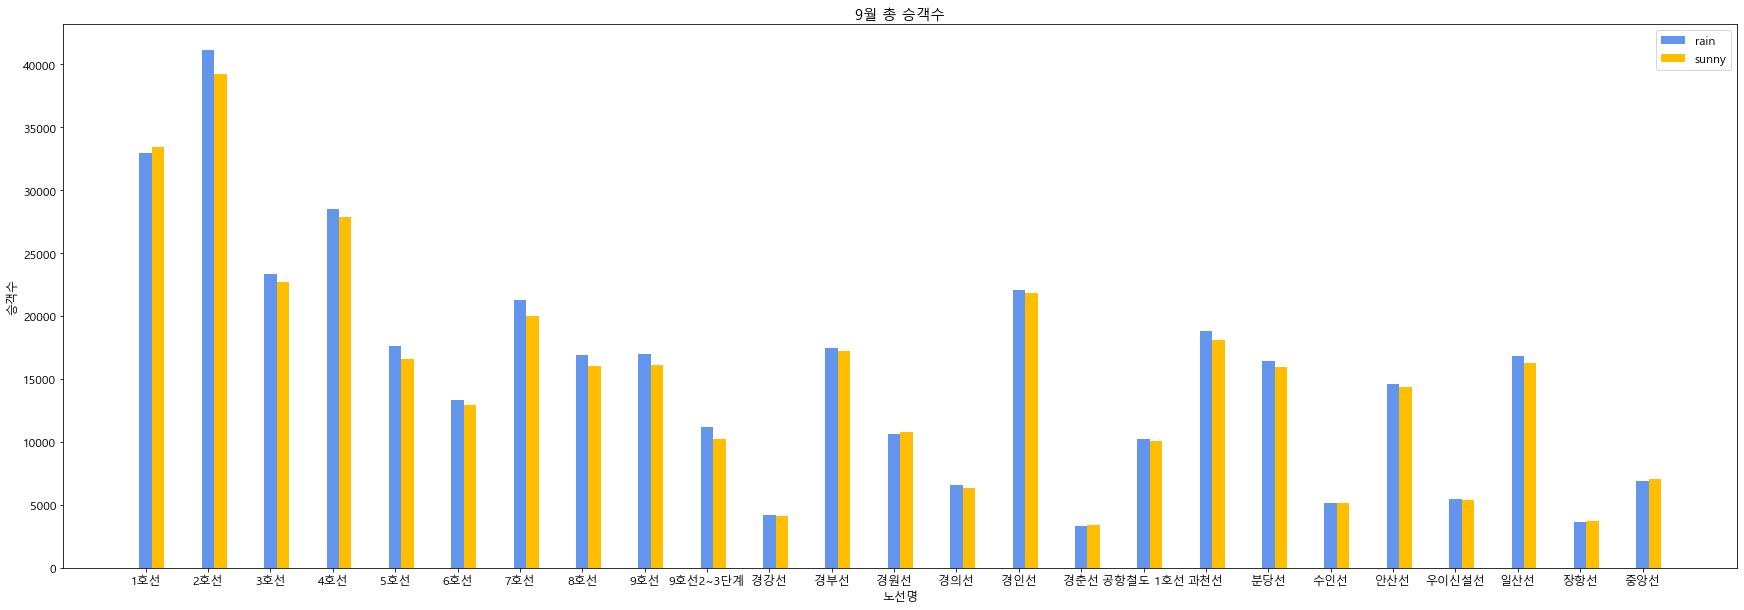

In [149]:
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (30,10)

plt.figure()

x = np.arange(25)
plt.bar(x-0.0, subway_df["rain_승객수"], label = "rain", width=0.2, color='#6495ED')
plt.bar(x+0.2, subway_df["sunny_승객수"], label = "sunny", width=0.2, color="#FFBF00")

plt.xticks(x, subway_df["노선명"])
plt.legend()
plt.xlabel("노선명")
plt.ylabel("승객수")
#plt.ylim(0,150)
plt.title("9월 총 승객수")

### 9월 버스 승객수 데이터 로드

In [151]:
bus = pd.read_csv('BUS_STATION_BOARDING_MONTH_202109.csv', encoding = "cp949")

In [152]:
bus

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20210901,100,100번(하계동~용산구청),11428,한성여객종점,14,1,20210904
1,20210901,100,100번(하계동~용산구청),11380,목련아파트상가,252,49,20210904
2,20210901,100,100번(하계동~용산구청),11381,중계목화아파트4단지,189,31,20210904
3,20210901,100,100번(하계동~용산구청),11438,노원경찰서,298,30,20210904
4,20210901,100,100번(하계동~용산구청),02099,숭례문(가상),0,23,20210904
...,...,...,...,...,...,...,...,...
1150362,20210930,1165,1165번(화계사~미아삼거리역),09227,솔샘터널,208,160,20211003
1150363,20210930,5625,5625번(안양~영등포역(영등포시장)),20001,동작상떼빌아파트,58,56,20211003
1150364,20210930,동작13,동작13(봉천고개관악현대아파트~대방역),21911,적십자센터,6,54,20211003
1150365,20210930,774,774번(구파발역~파주읍),31588,용미1리.한민고,23,22,20211003


In [153]:
bus['승객수'] = bus['승차총승객수']+bus['하차총승객수']

In [154]:
bus_select = bus.loc[:,['사용일자','노선번호','승객수']]

In [155]:
bus_select

,사용일자,노선번호,승객수
0,20210901,100,15
1,20210901,100,301
2,20210901,100,220
3,20210901,100,328
4,20210901,100,23
...,...,...,...
1150362,20210930,1165,368
1150363,20210930,5625,114
1150364,20210930,동작13,60
1150365,20210930,774,45


In [156]:
bus_select['비'] = bus_select['사용일자'].isin(rain['비'])

In [157]:
bus_select

,사용일자,노선번호,승객수,비
0,20210901,100,15,True
1,20210901,100,301,True
2,20210901,100,220,True
3,20210901,100,328,True
4,20210901,100,23,True
...,...,...,...,...
1150362,20210930,1165,368,False
1150363,20210930,5625,114,False
1150364,20210930,동작13,60,False
1150365,20210930,774,45,False


In [177]:
bus_station = bus_select.groupby(['사용일자','노선번호'], as_index=False).mean()

In [178]:
bus_station

,사용일자,노선번호,승객수,비
0,20210901,0017,257.463415,True
1,20210901,01A,30.490566,True
2,20210901,01B,35.488889,True
3,20210901,02,101.481481,True
4,20210901,04,80.500000,True
...,...,...,...,...
18423,20210930,종로11,230.238095,False
18424,20210930,종로12,330.705882,False
18425,20210930,종로13,52.513514,False
18426,20210930,중랑01,34.277778,False


In [179]:
bus_rain = bus_station[bus_station['비']==True]
bus_sunny = bus_station[bus_station['비']==False]

In [180]:
bus_rain

,사용일자,노선번호,승객수,비
0,20210901,0017,257.463415,True
1,20210901,01A,30.490566,True
2,20210901,01B,35.488889,True
3,20210901,02,101.481481,True
4,20210901,04,80.500000,True
...,...,...,...,...
17805,20210929,종로11,208.571429,True
17806,20210929,종로12,333.000000,True
17807,20210929,종로13,47.675676,True
17808,20210929,중랑01,30.222222,True


In [181]:
bus_sunny

,사용일자,노선번호,승객수,비
617,20210902,0017,264.268293,False
618,20210902,01A,30.603774,False
619,20210902,01B,34.155556,False
620,20210902,02,120.074074,False
621,20210902,04,89.307692,False
...,...,...,...,...
18423,20210930,종로11,230.238095,False
18424,20210930,종로12,330.705882,False
18425,20210930,종로13,52.513514,False
18426,20210930,중랑01,34.277778,False


In [182]:
len(bus['노선번호'].unique())

620

In [174]:
len(bus['버스정류장ARS번호'].unique())

12549

In [175]:
len(bus['역명'].unique())

8057

In [183]:
bus_rain.rename(columns = {'승객수':'rain_승객수'}, inplace=True)
bus_sunny.rename(columns = {'승객수':'sunny_승객수'}, inplace=True)

In [184]:
bus_rain2 = bus_rain.groupby('노선번호', as_index=False).mean().loc[:,['노선번호', 'rain_승객수']]
bus_sunny2 = bus_sunny.groupby('노선번호', as_index=False).mean().loc[:,['노선번호', 'sunny_승객수']]

In [185]:
bus_rain2

,노선번호,rain_승객수
0,0017,233.640921
1,01A,26.199717
2,01B,28.703286
3,02,154.798354
4,04,100.136752
...,...,...
615,종로11,190.576720
616,종로12,255.973856
617,종로13,42.731280
618,중랑01,27.437763


In [186]:
bus_sunny2

,노선번호,sunny_승객수
0,0017,220.694541
1,01A,22.926315
2,01B,25.928507
3,02,229.031746
4,04,143.485348
...,...,...
615,종로11,221.099773
616,종로12,209.097689
617,종로13,40.002080
618,중랑01,25.373327


In [187]:
bus_df = pd.merge(left = bus_rain2, right = bus_sunny2, how="inner", on="노선번호")

In [188]:
bus_df

,노선번호,rain_승객수,sunny_승객수
0,0017,233.640921,220.694541
1,01A,26.199717,22.926315
2,01B,28.703286,25.928507
3,02,154.798354,229.031746
4,04,100.136752,143.485348
...,...,...,...
615,종로11,190.576720,221.099773
616,종로12,255.973856,209.097689
617,종로13,42.731280,40.002080
618,중랑01,27.437763,25.373327


In [189]:
bus_df['rain-sunny'] = bus_df['rain_승객수'] - bus_df['sunny_승객수']

In [190]:
bus_df

,노선번호,rain_승객수,sunny_승객수,rain-sunny
0,0017,233.640921,220.694541,12.946380
1,01A,26.199717,22.926315,3.273402
2,01B,28.703286,25.928507,2.774779
3,02,154.798354,229.031746,-74.233392
4,04,100.136752,143.485348,-43.348596
...,...,...,...,...
615,종로11,190.576720,221.099773,-30.523054
616,종로12,255.973856,209.097689,46.876167
617,종로13,42.731280,40.002080,2.729200
618,중랑01,27.437763,25.373327,2.064436


In [192]:
bus_df[bus_df['rain-sunny']>0]

,노선번호,rain_승객수,sunny_승객수,rain-sunny
0,0017,233.640921,220.694541,12.946380
1,01A,26.199717,22.926315,3.273402
2,01B,28.703286,25.928507,2.774779
7,1014,360.321321,357.391248,2.930073
8,1017,111.985714,105.108656,6.877058
...,...,...,...,...
613,종로08,410.440972,397.973214,12.467758
616,종로12,255.973856,209.097689,46.876167
617,종로13,42.731280,40.002080,2.729200
618,중랑01,27.437763,25.373327,2.064436


In [194]:
bus_df[bus_df['rain-sunny']<=0]

,노선번호,rain_승객수,sunny_승객수,rain-sunny
3,02,154.798354,229.031746,-74.233392
4,04,100.136752,143.485348,-43.348596
5,100,208.846995,212.883294,-4.036300
6,101,319.787729,322.545335,-2.757606
10,1020,179.870370,186.184303,-6.313933
...,...,...,...,...
595,용산03,219.204301,226.506912,-7.302611
608,종로01,83.565657,84.805195,-1.239538
609,종로02,148.300095,149.784968,-1.484873
614,종로09,243.865497,253.849624,-9.984127
